In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [17]:
data = pd.read_csv("../data/raw/aug_train.csv")


In [23]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
target                     float64
dtype: object

In [26]:
data.gender.astype('category').cat.codes
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [94]:
df = (data.dropna(axis = 0)
    .drop(columns='target')
    .rename(columns = {"city_development_index": "city_index"})
    .sort_values("city_index", ascending= True)
    .loc[:, ["gender", "company_type", "training_hours"]]
)
df

,gender,company_type,training_hours
16555,Male,Pvt Ltd,16
10401,Male,Pvt Ltd,36
7724,Male,Pvt Ltd,28
17701,Male,Public Sector,44
16362,Male,Other,43
...,...,...,...
16947,Male,Pvt Ltd,134
2449,Male,Pvt Ltd,67
18537,Male,Pvt Ltd,105
2929,Male,Pvt Ltd,14


In [95]:
df['gender_code'] = df.gender.astype('category').cat.codes
df['company_type_code'] = df.company_type.astype('category').cat.codes

<AxesSubplot:ylabel='Frequency'>

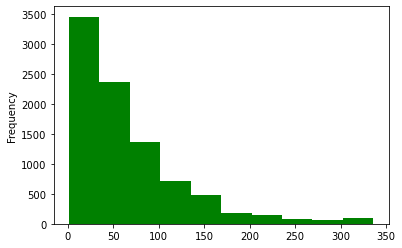

In [96]:
df['training_hours'].plot(kind='hist', facecolor='green')

<AxesSubplot:>

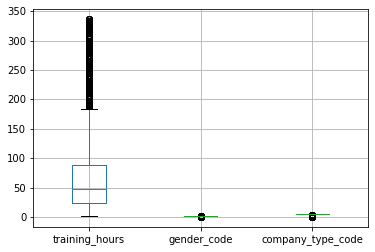

In [97]:
df.boxplot()

<AxesSubplot:>

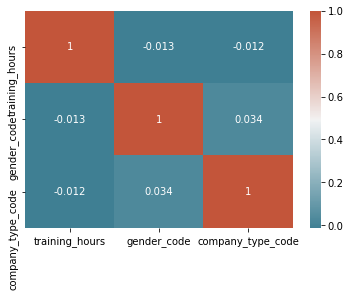

In [98]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

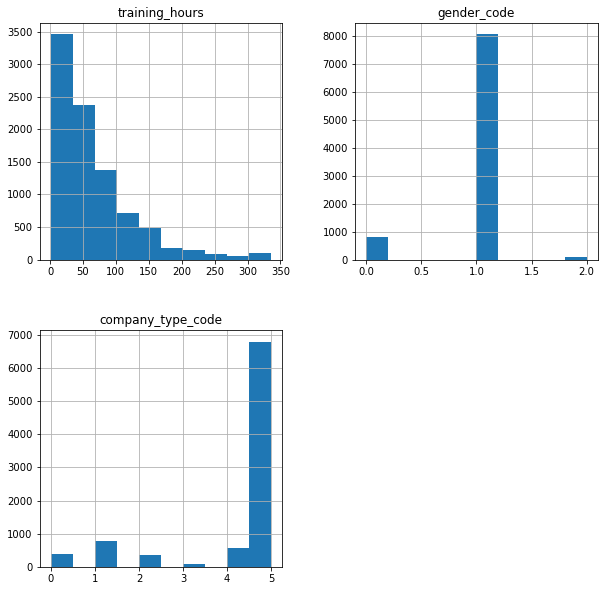

In [99]:
hist = df.hist(bins=10, figsize=(10, 10))

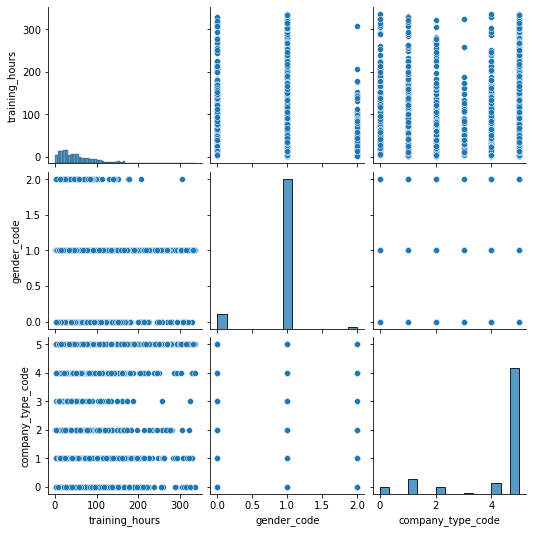

In [100]:
sns.pairplot(df)

<AxesSubplot:xlabel='gender'>

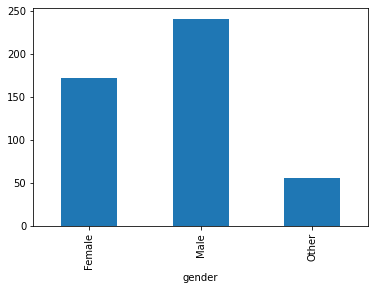

In [101]:
df.groupby('gender')['training_hours'].nunique().plot(kind = 'bar')


<AxesSubplot:xlabel='company_type'>

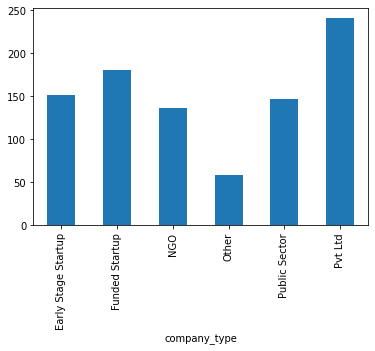

In [102]:
df.groupby('company_type')['training_hours'].nunique().plot(kind = 'bar')